In [18]:
import pandas as pd

# Load CSV data
deliveries = pd.read_csv("../data/IPL_ball_by_ball_updated.csv")

# Check the first 5 rows
deliveries.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,18-04-2008,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,335982,2008,18-04-2008,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,18-04-2008,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,18-04-2008,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,18-04-2008,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# See the number of rows and columns
print(deliveries.shape)

# Column names
print(deliveries.columns)

# Basic info (data types, missing values)
deliveries.info()

# Quick statistics for numeric columns
deliveries.describe()


(243815, 22)
Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243815 entries, 0 to 243814
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243815 non-null  int64  
 1   season                  243815 non-null  int64  
 2   start_date              243815 non-null  object 
 3   venue                   243815 non-null  object 
 4   innings                 243815 non-null  int64  
 5   ball                    243815 non-null  float64
 6   batting_team            243815 non-null  object 
 7   bowling_team            243815 non-nu

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed
count,2.438150e+05,243815.000000,243815.000000,243815.000000,243815.000000,243815.000000,7652.000000,1018.000000,628.000000,3778.000000,2.0,0.0,0.0
mean,8.707326e+05,2015.611119,1.483781,9.557662,1.252614,0.067174,1.204260,1.034381,1.867834,1.304129,5.0,NaN,NaN
std,3.532362e+05,4.650281,0.502855,5.686347,1.626764,0.341990,0.788406,0.325568,1.312454,0.847922,0.0,NaN,NaN
min,3.359820e+05,2008.000000,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
25%,5.483160e+05,2012.000000,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
50%,8.298190e+05,2015.000000,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN
75%,1.216507e+06,2020.000000,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN
max,1.370353e+06,2023.000000,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN


In [22]:
# Count missing values per column
print(deliveries.isnull().sum())

# Example: Fill missing numeric values with 0
numeric_cols = deliveries.select_dtypes(include='number').columns
deliveries[numeric_cols] = deliveries[numeric_cols].fillna(0)

# Example: Fill missing categorical values with 'Unknown'
categorical_cols = deliveries.select_dtypes(include='object').columns
deliveries[categorical_cols] = deliveries[categorical_cols].fillna('Unknown')


match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     236163
noballs                   242797
byes                      243187
legbyes                   240037
penalty                   243813
wicket_type               231748
player_dismissed          231748
other_wicket_type         243815
other_player_dismissed    243815
dtype: int64


In [23]:
# Drop columns that are not needed
columns_to_drop = ['match_id', 'date', 'venue', 'city']  # example, adjust based on your dataset
deliveries = deliveries.drop(columns=columns_to_drop, errors='ignore')


In [25]:
# List all columns
print(deliveries.columns)


Index(['season', 'start_date', 'innings', 'ball', 'batting_team',
       'bowling_team', 'striker', 'non_striker', 'bowler', 'runs_off_bat',
       'extras', 'wides', 'noballs', 'byes', 'legbyes', 'penalty',
       'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
deliveries[numeric_features] = scaler.fit_transform(deliveries[numeric_features])


In [33]:
deliveries.to_csv("../data/processed_deliveries_normalized.csv", index=False)
print("Normalized data saved successfully!")


Normalized data saved successfully!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Better plot style
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv("../data/processed_deliveries_normalized.csv")
df.head()



,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,total_runs,wicket,cumulative_runs
0,335982,2008,18-04-2008,M Chinnaswamy Stadium,0.0,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,...,0.0,1.0,0.0,Unknown,Unknown,0.0,0.0,0.142857,0.0,0.0
1,335982,2008,18-04-2008,M Chinnaswamy Stadium,0.0,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0.0,0.0,0.0,Unknown,Unknown,0.0,0.0,0.000000,0.0,0.0
2,335982,2008,18-04-2008,M Chinnaswamy Stadium,0.0,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0.0,0.0,0.0,Unknown,Unknown,0.0,0.0,0.142857,0.0,0.0
3,335982,2008,18-04-2008,M Chinnaswamy Stadium,0.0,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0.0,0.0,0.0,Unknown,Unknown,0.0,0.0,0.000000,0.0,0.0
4,335982,2008,18-04-2008,M Chinnaswamy Stadium,0.0,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,...,0.0,0.0,0.0,Unknown,Unknown,0.0,0.0,0.000000,0.0,0.0


In [3]:
df.shape        # rows, columns
df.columns      # column names
df.info()       # data types & missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243815 entries, 0 to 243814
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243815 non-null  int64  
 1   season                  243815 non-null  int64  
 2   start_date              243815 non-null  object 
 3   venue                   243815 non-null  object 
 4   innings                 243815 non-null  float64
 5   ball                    243815 non-null  float64
 6   batting_team            243815 non-null  object 
 7   bowling_team            243815 non-null  object 
 8   striker                 243815 non-null  object 
 9   non_striker             243815 non-null  object 
 10  bowler                  243815 non-null  object 
 11  runs_off_bat            243815 non-null  float64
 12  extras                  243815 non-null  float64
 13  wides                   243815 non-null  float64
 14  noballs             

In [4]:
df.describe()



,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,total_runs,wicket,cumulative_runs
count,2.438150e+05,243815.000000,243815.000000,243815.000000,243815.000000,243815.000000,243815.000000,243815.000000,243815.000000,243815.000000,243815.000000,243815.0,243815.0,243815.000000,243815.0,243815.000000
mean,8.707326e+05,2015.611119,0.096756,9.557662,0.208769,0.009596,0.037795,0.004319,0.004811,0.020208,0.000041,0.0,0.0,0.188541,0.0,0.175114
std,3.532362e+05,4.650281,0.100571,5.686347,0.271127,0.048856,0.252175,0.069934,0.115727,0.192570,0.014320,0.0,0.0,0.230636,0.0,0.185355
min,3.359820e+05,2008.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000
25%,5.483160e+05,2012.000000,0.000000,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.033274
50%,8.298190e+05,2015.000000,0.000000,9.400000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.142857,0.0,0.111096
75%,1.216507e+06,2020.000000,0.200000,14.400000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.142857,0.0,0.258078
max,1.370353e+06,2023.000000,1.000000,19.900000,1.000000,1.000000,5.000000,5.000000,4.000000,5.000000,5.000000,0.0,0.0,1.000000,0.0,1.000000


In [5]:
df.isnull().sum()



match_id                  0
season                    0
start_date                0
venue                     0
innings                   0
ball                      0
batting_team              0
bowling_team              0
striker                   0
non_striker               0
bowler                    0
runs_off_bat              0
extras                    0
wides                     0
noballs                   0
byes                      0
legbyes                   0
penalty                   0
wicket_type               0
player_dismissed          0
other_wicket_type         0
other_player_dismissed    0
total_runs                0
wicket                    0
cumulative_runs           0
dtype: int64

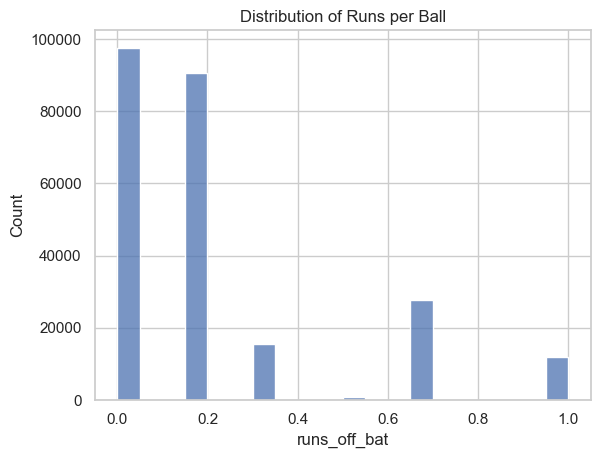

In [6]:
sns.histplot(df['runs_off_bat'], bins=20)
plt.title("Distribution of Runs per Ball")
plt.show()



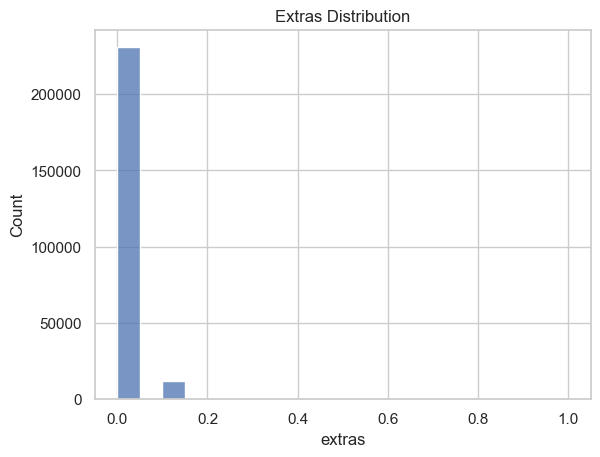

In [7]:
sns.histplot(df['extras'], bins=20)
plt.title("Extras Distribution")
plt.show()


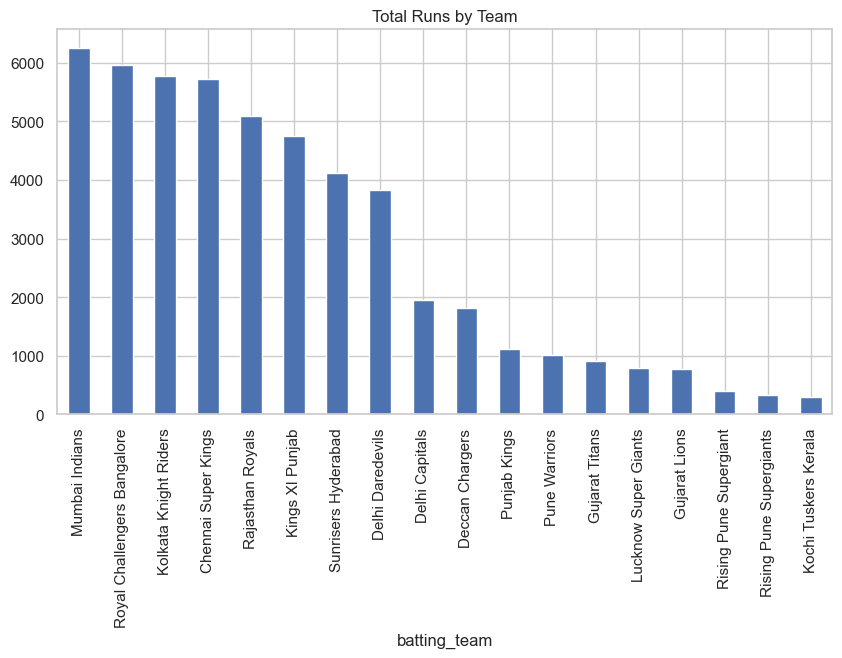

In [8]:
team_runs = df.groupby('batting_team')['runs_off_bat'].sum().sort_values(ascending=False)

team_runs.plot(kind='bar', figsize=(10,5))
plt.title("Total Runs by Team")
plt.show()


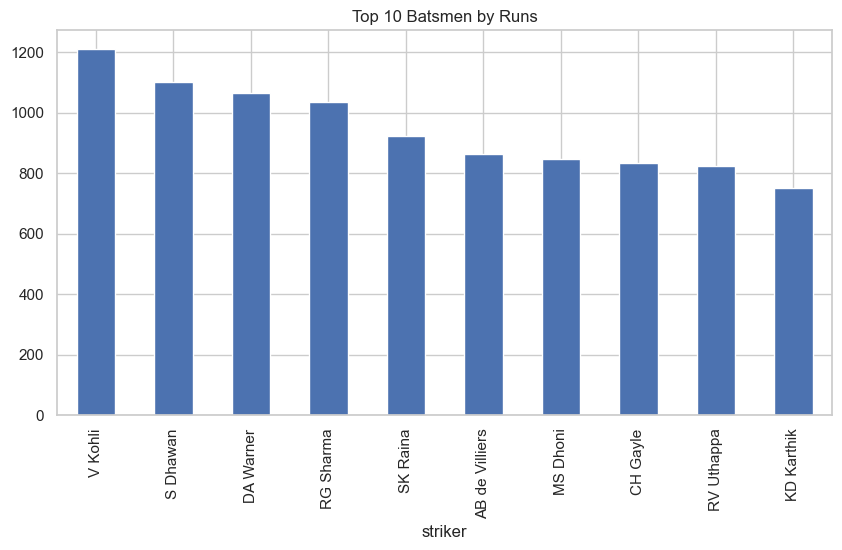

In [9]:
top_batsmen = df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

top_batsmen.plot(kind='bar', figsize=(10,5))
plt.title("Top 10 Batsmen by Runs")
plt.show()


In [10]:
wickets = df['wicket_type'].notnull().sum()
wickets


np.int64(243815)

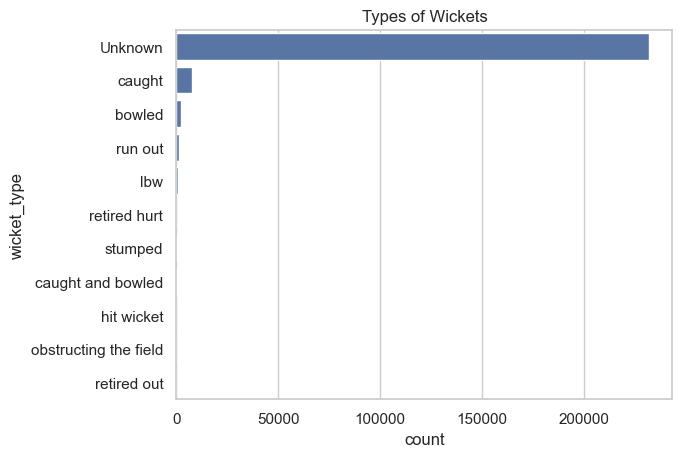

In [11]:
sns.countplot(y='wicket_type', data=df)
plt.title("Types of Wickets")
plt.show()


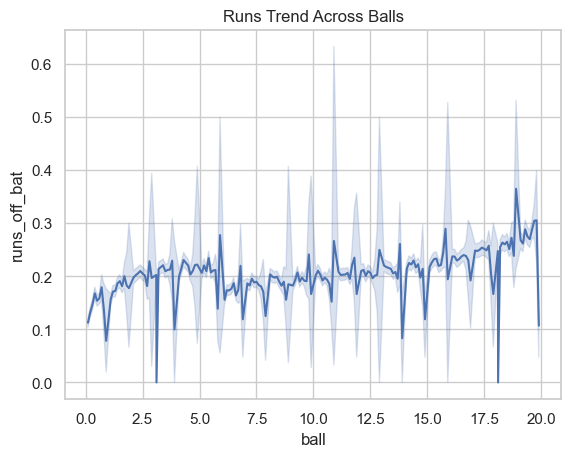

In [12]:
sns.lineplot(x='ball', y='runs_off_bat', data=df)
plt.title("Runs Trend Across Balls")
plt.show()


## Key Insights

- Most deliveries result in 0–1 runs, indicating defensive play is common.
- A small number of teams and batsmen contribute the majority of total runs.
- Extras contribute less to total runs compared to runs scored off the bat.
- Wickets tend to occur more frequently in the later overs of an innings.


In [28]:
# Total runs scored by a batsman in this delivery
deliveries['total_runs'] = deliveries['runs_off_bat'] + deliveries['extras']

# Strike rate per delivery (runs per ball)
deliveries['strike_rate'] = deliveries['runs_off_bat'] / 1  # 1 ball per row

# Wickets taken by a bowler
deliveries['wicket'] = deliveries['player_dismissed'].notnull().astype(int)

# Cumulative runs per striker (optional)
deliveries['cumulative_runs'] = deliveries.groupby('striker')['runs_off_bat'].cumsum()


In [29]:
deliveries.to_csv("../data/processed_deliveries.csv", index=False)
print("Processed data saved successfully!")


Processed data saved successfully!


In [30]:
import pandas as pd

# Load your cleaned & processed data
deliveries = pd.read_csv("../data/processed_deliveries.csv")


In [31]:
numeric_features = ['innings', 'runs_off_bat', 'extras', 'wicket', 'total_runs', 'cumulative_runs']


In [20]:
# Count missing values per column
print(deliveries.isnull().sum())



match_id                       0
season                         0
start_date                     0
venue                          0
innings                        0
ball                           0
batting_team                   0
bowling_team                   0
striker                        0
non_striker                    0
bowler                         0
runs_off_bat                   0
extras                         0
wides                     236163
noballs                   242797
byes                      243187
legbyes                   240037
penalty                   243813
wicket_type               231748
player_dismissed          231748
other_wicket_type         243815
other_player_dismissed    243815
dtype: int64


In [21]:
# Save processed data
deliveries.to_csv("../data/processed_deliveries.csv", index=False)
